In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [75]:
df = pd.read_csv("Measurements.csv")

In [76]:
display(df.shape)
display(df.dtypes)

(55, 4)

time        float64
distance    float64
material     object
density     float64
dtype: object

In [77]:
df['speed'] = df['distance'] / df['time']

C:\Users\lukas\AppData\Local\Temp\ipykernel_23880\3142585067.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()


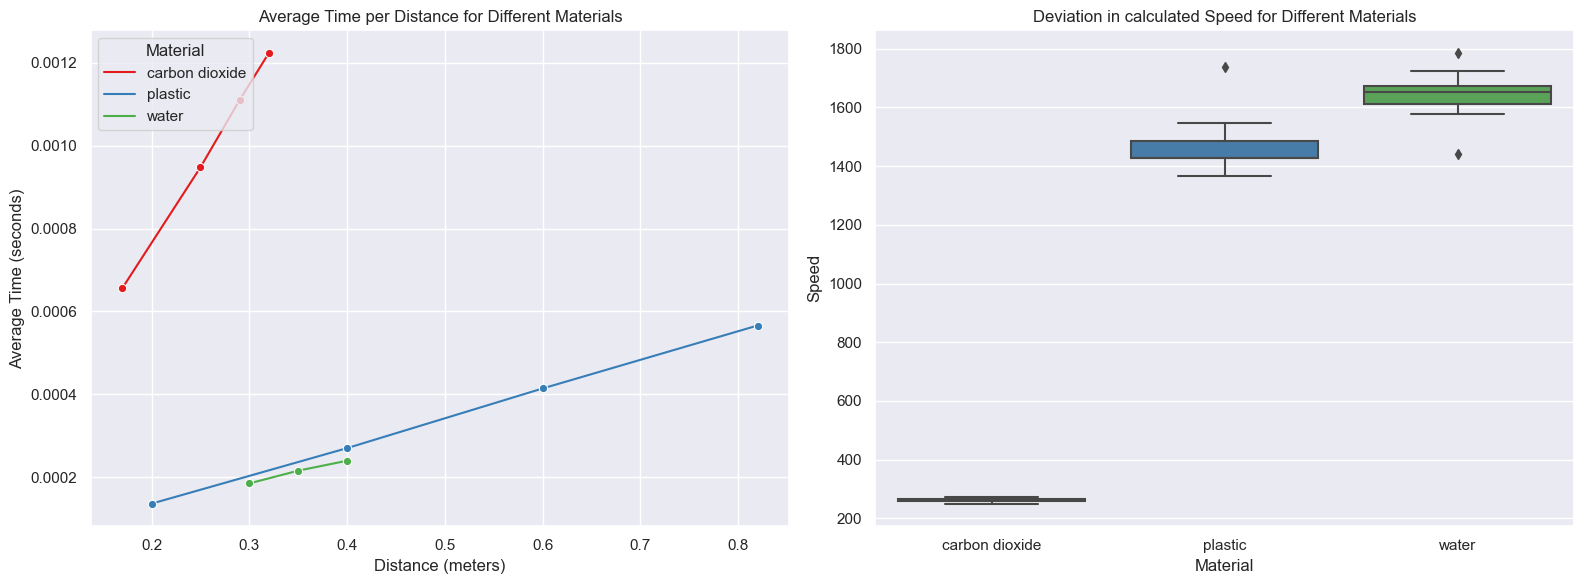

In [85]:
# Set the style of the plot
sns.set(style="darkgrid")

# Create subplots with two plots (line plot and boxplot) side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create dataframe with averaged data for speed and distance
averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()


# Plot 1: Line plot (average time per distance)
sns.lineplot(data=averaged_df, x='distance', y='time', hue='material', marker='o', palette='Set1', ax=axes[0])
axes[0].set_xlabel('Distance (meters)')
axes[0].set_ylabel('Average Time (seconds)')
axes[0].set_title('Average Time per Distance for Different Materials')
axes[0].legend(title="Material", loc="upper left")



# Plot 3: Boxplot (speed deviation)
sns.boxplot(data=df, x='material', y='speed', palette='Set1', ax=axes[1])
axes[1].set_xlabel('Material')
axes[1].set_ylabel('Speed')
axes[1].set_title('Deviation in calculated Speed for Different Materials')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plots
plt.show()

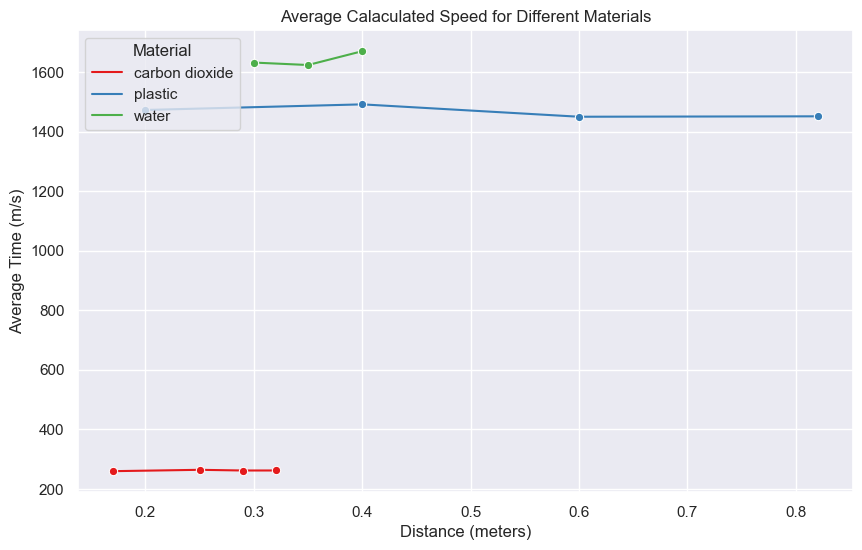

In [86]:
# Create a line plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use seaborn's lineplot to create the plot
sns.lineplot(data=averaged_df, x='distance', y='speed', hue='material', marker='o', palette='Set1')

# Set labels and title
plt.xlabel('Distance (meters)')
plt.ylabel('Average Time (m/s)')
plt.title('Average Calaculated Speed for Different Materials')

# Show legend
plt.legend(title="Material", loc="upper left")

# Show the plot
plt.grid(True)
plt.show()

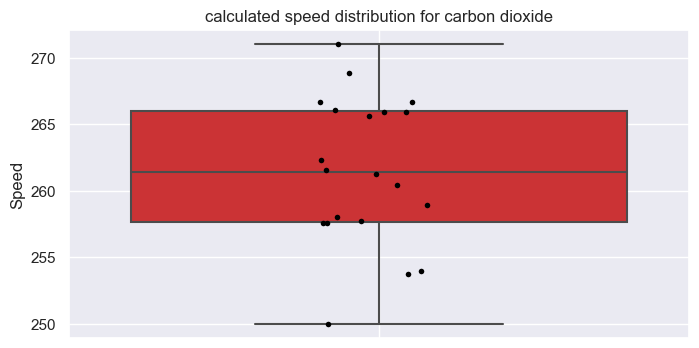

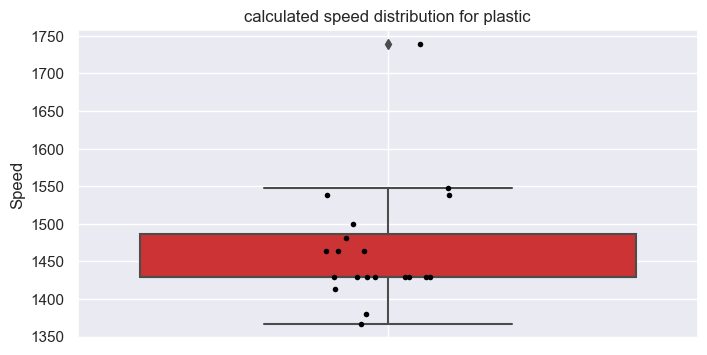

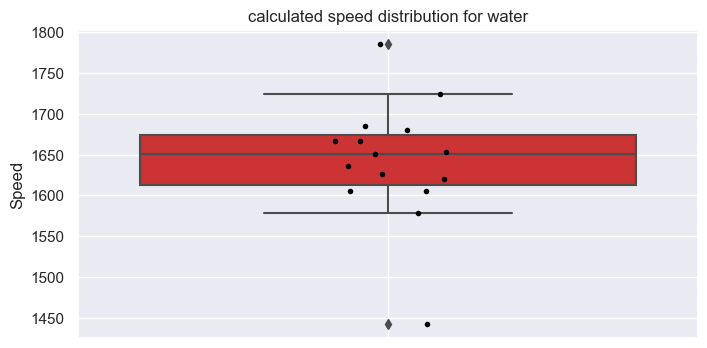

In [87]:
# Get unique material values
materials = df['material'].unique()

# Create three separate plots for each material
for material in materials:
    material_df = df[df['material'] == material]
    
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    
    # Create a boxplot for the material
    sns.boxplot(data=material_df, y='speed', palette='Set1')
    
    # Add individual measurements as crosses (or points)
    sns.stripplot(data=material_df, y='speed', jitter=True, color='black', size=4)
    
    # Set labels and title
    plt.ylabel('Speed')
    plt.title(f'calculated speed distribution for {material}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.grid(True)
    plt.show()

NameError: name 'LinearRegression' is not defined

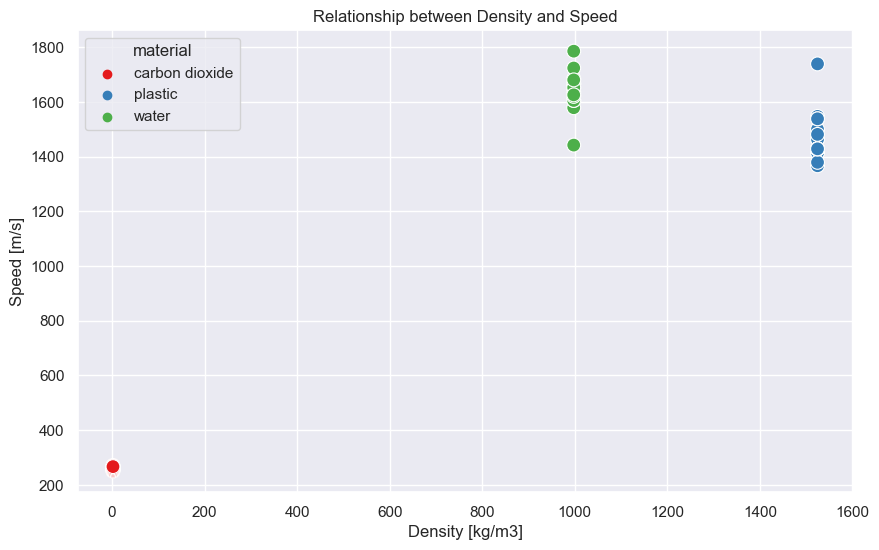

In [103]:
# Create a scatterplot with regression line
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='density', y='speed', hue='material', palette='Set1', s=100)
plt.xlabel('Density [kg/m3]')
plt.ylabel('Speed [m/s]')
plt.title('Relationship between Density and Speed')

# Fit a linear regression model to the data points
X = df['density'].values.reshape(-1, 1)
y = df['speed'].values

regressor = LinearRegression()
regressor.fit(X, y)

# Plot the regression line
x_values = np.linspace(df['density'].min(), df['density'].max(), 100)
y_values = regressor.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, linestyle='--', color='red', label='Regression Line')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print regression coefficients
print(f'Regression Coefficients: Intercept = {regressor.intercept_}, Slope = {regressor.coef_[0]}')